## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9805587	total: 52.2ms	remaining: 52.1s
1:	learn: 0.9476229	total: 53.9ms	remaining: 26.9s
2:	learn: 0.9197232	total: 54.4ms	remaining: 18.1s
3:	learn: 0.8887383	total: 56ms	remaining: 13.9s
4:	learn: 0.8595208	total: 56.9ms	remaining: 11.3s
5:	learn: 0.8333135	total: 57.6ms	remaining: 9.54s
6:	learn: 0.8086424	total: 58.1ms	remaining: 8.25s
7:	learn: 0.7838206	total: 58.9ms	remaining: 7.31s
8:	learn: 0.7578430	total: 59.7ms	remaining: 6.58s
9:	learn: 0.7342204	total: 61.9ms	remaining: 6.13s
10:	learn: 0.7113019	total: 62.3ms	remaining: 5.6s
11:	learn: 0.6901567	total: 62.7ms	remaining: 5.17s
12:	learn: 0.6680900	total: 63.8ms	remaining: 4.84s
13:	learn: 0.6473822	total: 65ms	remaining: 4.58s
14:	learn: 0.6270713	total: 66.2ms	remaining: 4.34s
15:	learn: 0.6065429	total: 66.8ms	remaining: 4.11s
16:	learn: 0.5877742	total: 67.2ms	remaining: 3.88s
17:	learn: 0.5704327	total: 68ms	remaining: 3.71s
18:	learn: 0.5538438	total: 68.4ms	remaining: 3.53s
19:	learn: 0.5364078	total: 6

165:	learn: 0.0482850	total: 156ms	remaining: 784ms
166:	learn: 0.0480865	total: 157ms	remaining: 782ms
167:	learn: 0.0478480	total: 158ms	remaining: 780ms
168:	learn: 0.0476411	total: 159ms	remaining: 780ms
169:	learn: 0.0474496	total: 159ms	remaining: 778ms
170:	learn: 0.0472415	total: 160ms	remaining: 775ms
171:	learn: 0.0470498	total: 160ms	remaining: 772ms
172:	learn: 0.0467808	total: 161ms	remaining: 769ms
173:	learn: 0.0465794	total: 162ms	remaining: 767ms
174:	learn: 0.0464332	total: 162ms	remaining: 764ms
175:	learn: 0.0462698	total: 163ms	remaining: 761ms
176:	learn: 0.0461811	total: 163ms	remaining: 758ms
177:	learn: 0.0460208	total: 164ms	remaining: 755ms
178:	learn: 0.0458057	total: 164ms	remaining: 754ms
179:	learn: 0.0456481	total: 166ms	remaining: 757ms
180:	learn: 0.0455174	total: 167ms	remaining: 755ms
181:	learn: 0.0453176	total: 168ms	remaining: 753ms
182:	learn: 0.0451504	total: 169ms	remaining: 754ms
183:	learn: 0.0450403	total: 170ms	remaining: 753ms
184:	learn: 

225:	learn: 0.0393970	total: 196ms	remaining: 670ms
226:	learn: 0.0393271	total: 196ms	remaining: 669ms
227:	learn: 0.0392068	total: 197ms	remaining: 667ms
228:	learn: 0.0390738	total: 198ms	remaining: 666ms
229:	learn: 0.0388383	total: 198ms	remaining: 664ms
230:	learn: 0.0386994	total: 199ms	remaining: 662ms
231:	learn: 0.0386076	total: 199ms	remaining: 660ms
232:	learn: 0.0385302	total: 200ms	remaining: 658ms
233:	learn: 0.0384228	total: 200ms	remaining: 656ms
234:	learn: 0.0382271	total: 201ms	remaining: 655ms
235:	learn: 0.0380971	total: 202ms	remaining: 653ms
236:	learn: 0.0378780	total: 202ms	remaining: 651ms
237:	learn: 0.0376724	total: 203ms	remaining: 649ms
238:	learn: 0.0375546	total: 203ms	remaining: 647ms
239:	learn: 0.0374320	total: 204ms	remaining: 645ms
240:	learn: 0.0373341	total: 204ms	remaining: 643ms
241:	learn: 0.0372329	total: 205ms	remaining: 641ms
242:	learn: 0.0371341	total: 205ms	remaining: 640ms
243:	learn: 0.0370136	total: 206ms	remaining: 639ms
244:	learn: 

390:	learn: 0.0261575	total: 304ms	remaining: 474ms
391:	learn: 0.0261219	total: 304ms	remaining: 472ms
392:	learn: 0.0260880	total: 306ms	remaining: 472ms
393:	learn: 0.0260432	total: 307ms	remaining: 472ms
394:	learn: 0.0259980	total: 308ms	remaining: 471ms
395:	learn: 0.0259671	total: 309ms	remaining: 471ms
396:	learn: 0.0259313	total: 310ms	remaining: 470ms
397:	learn: 0.0258973	total: 310ms	remaining: 469ms
398:	learn: 0.0258294	total: 310ms	remaining: 468ms
399:	learn: 0.0257958	total: 312ms	remaining: 468ms
400:	learn: 0.0257340	total: 313ms	remaining: 468ms
401:	learn: 0.0257079	total: 314ms	remaining: 467ms
402:	learn: 0.0256843	total: 316ms	remaining: 468ms
403:	learn: 0.0256178	total: 317ms	remaining: 468ms
404:	learn: 0.0255661	total: 317ms	remaining: 466ms
405:	learn: 0.0255337	total: 318ms	remaining: 465ms
406:	learn: 0.0254693	total: 318ms	remaining: 464ms
407:	learn: 0.0254277	total: 319ms	remaining: 462ms
408:	learn: 0.0253652	total: 319ms	remaining: 461ms
409:	learn: 

454:	learn: 0.0235846	total: 345ms	remaining: 413ms
455:	learn: 0.0235344	total: 346ms	remaining: 412ms
456:	learn: 0.0235163	total: 346ms	remaining: 411ms
457:	learn: 0.0234953	total: 347ms	remaining: 411ms
458:	learn: 0.0234548	total: 347ms	remaining: 410ms
459:	learn: 0.0234113	total: 348ms	remaining: 408ms
460:	learn: 0.0233689	total: 349ms	remaining: 408ms
461:	learn: 0.0233110	total: 349ms	remaining: 407ms
462:	learn: 0.0232761	total: 350ms	remaining: 406ms
463:	learn: 0.0232378	total: 350ms	remaining: 405ms
464:	learn: 0.0232126	total: 351ms	remaining: 403ms
465:	learn: 0.0231730	total: 351ms	remaining: 402ms
466:	learn: 0.0231271	total: 352ms	remaining: 401ms
467:	learn: 0.0230803	total: 352ms	remaining: 400ms
468:	learn: 0.0230439	total: 353ms	remaining: 399ms
469:	learn: 0.0229886	total: 353ms	remaining: 398ms
470:	learn: 0.0229402	total: 353ms	remaining: 397ms
471:	learn: 0.0229098	total: 354ms	remaining: 396ms
472:	learn: 0.0228775	total: 355ms	remaining: 395ms
473:	learn: 

584:	learn: 0.0198876	total: 441ms	remaining: 313ms


585:	learn: 0.0198493	total: 442ms	remaining: 312ms
586:	learn: 0.0198273	total: 444ms	remaining: 312ms
587:	learn: 0.0198178	total: 445ms	remaining: 312ms
588:	learn: 0.0198023	total: 445ms	remaining: 310ms
589:	learn: 0.0197875	total: 447ms	remaining: 311ms
590:	learn: 0.0197654	total: 449ms	remaining: 311ms
591:	learn: 0.0197513	total: 449ms	remaining: 310ms
592:	learn: 0.0197259	total: 450ms	remaining: 309ms
593:	learn: 0.0197193	total: 456ms	remaining: 312ms
594:	learn: 0.0197067	total: 457ms	remaining: 311ms
595:	learn: 0.0196693	total: 457ms	remaining: 310ms
596:	learn: 0.0196551	total: 458ms	remaining: 309ms
597:	learn: 0.0196246	total: 458ms	remaining: 308ms
598:	learn: 0.0196035	total: 460ms	remaining: 308ms
599:	learn: 0.0195863	total: 461ms	remaining: 307ms
600:	learn: 0.0195691	total: 462ms	remaining: 307ms
601:	learn: 0.0195544	total: 463ms	remaining: 306ms
602:	learn: 0.0195401	total: 463ms	remaining: 305ms
603:	learn: 0.0195153	total: 464ms	remaining: 304ms
604:	learn: 

755:	learn: 0.0167079	total: 562ms	remaining: 182ms
756:	learn: 0.0166938	total: 565ms	remaining: 181ms
757:	learn: 0.0166804	total: 566ms	remaining: 181ms
758:	learn: 0.0166735	total: 566ms	remaining: 180ms
759:	learn: 0.0166685	total: 567ms	remaining: 179ms
760:	learn: 0.0166464	total: 568ms	remaining: 178ms
761:	learn: 0.0166226	total: 568ms	remaining: 178ms
762:	learn: 0.0166110	total: 569ms	remaining: 177ms
763:	learn: 0.0165979	total: 569ms	remaining: 176ms
764:	learn: 0.0165684	total: 570ms	remaining: 175ms
765:	learn: 0.0165592	total: 570ms	remaining: 174ms
766:	learn: 0.0165481	total: 571ms	remaining: 173ms
767:	learn: 0.0165361	total: 572ms	remaining: 173ms
768:	learn: 0.0165275	total: 573ms	remaining: 172ms
769:	learn: 0.0165119	total: 573ms	remaining: 171ms
770:	learn: 0.0165031	total: 574ms	remaining: 170ms
771:	learn: 0.0164904	total: 575ms	remaining: 170ms
772:	learn: 0.0164694	total: 576ms	remaining: 169ms
773:	learn: 0.0164467	total: 577ms	remaining: 169ms


774:	learn: 0.0164344	total: 580ms	remaining: 168ms
775:	learn: 0.0164220	total: 581ms	remaining: 168ms
776:	learn: 0.0164140	total: 582ms	remaining: 167ms
777:	learn: 0.0163891	total: 583ms	remaining: 166ms
778:	learn: 0.0163772	total: 584ms	remaining: 166ms
779:	learn: 0.0163684	total: 587ms	remaining: 166ms
780:	learn: 0.0163605	total: 588ms	remaining: 165ms
781:	learn: 0.0163487	total: 589ms	remaining: 164ms
782:	learn: 0.0163297	total: 590ms	remaining: 163ms
783:	learn: 0.0163079	total: 591ms	remaining: 163ms
784:	learn: 0.0162965	total: 592ms	remaining: 162ms
785:	learn: 0.0162909	total: 593ms	remaining: 161ms
786:	learn: 0.0162729	total: 593ms	remaining: 161ms
787:	learn: 0.0162618	total: 594ms	remaining: 160ms
788:	learn: 0.0162486	total: 595ms	remaining: 159ms
789:	learn: 0.0162380	total: 595ms	remaining: 158ms
790:	learn: 0.0162296	total: 596ms	remaining: 157ms
791:	learn: 0.0162190	total: 596ms	remaining: 157ms
792:	learn: 0.0161844	total: 597ms	remaining: 156ms
793:	learn: 

969:	learn: 0.0140369	total: 710ms	remaining: 21.9ms
970:	learn: 0.0140150	total: 710ms	remaining: 21.2ms
971:	learn: 0.0140098	total: 711ms	remaining: 20.5ms
972:	learn: 0.0140037	total: 711ms	remaining: 19.7ms
973:	learn: 0.0139978	total: 712ms	remaining: 19ms
974:	learn: 0.0139819	total: 713ms	remaining: 18.3ms
975:	learn: 0.0139769	total: 713ms	remaining: 17.5ms
976:	learn: 0.0139722	total: 714ms	remaining: 16.8ms
977:	learn: 0.0139655	total: 714ms	remaining: 16.1ms
978:	learn: 0.0139590	total: 715ms	remaining: 15.3ms
979:	learn: 0.0139501	total: 715ms	remaining: 14.6ms
980:	learn: 0.0139430	total: 716ms	remaining: 13.9ms
981:	learn: 0.0139339	total: 717ms	remaining: 13.1ms
982:	learn: 0.0139283	total: 717ms	remaining: 12.4ms
983:	learn: 0.0139216	total: 718ms	remaining: 11.7ms
984:	learn: 0.0139030	total: 718ms	remaining: 10.9ms
985:	learn: 0.0138942	total: 719ms	remaining: 10.2ms
986:	learn: 0.0138764	total: 719ms	remaining: 9.47ms
987:	learn: 0.0138738	total: 720ms	remaining: 8.

993:	learn: 0.0138230	total: 723ms	remaining: 4.37ms
994:	learn: 0.0138151	total: 726ms	remaining: 3.65ms
995:	learn: 0.0137940	total: 726ms	remaining: 2.92ms
996:	learn: 0.0137839	total: 727ms	remaining: 2.19ms
997:	learn: 0.0137617	total: 727ms	remaining: 1.46ms
998:	learn: 0.0137581	total: 728ms	remaining: 728us
999:	learn: 0.0137479	total: 728ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.018739141682081552
ABC Pre-generator MAE 0.8196407185865369


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

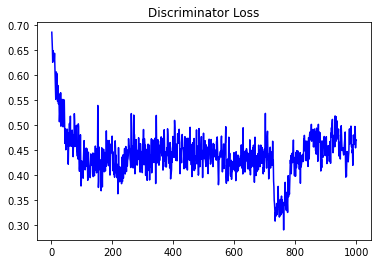

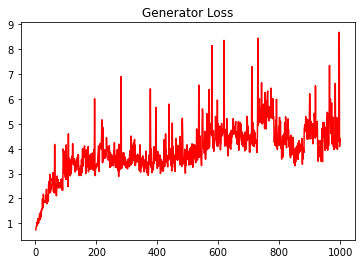

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.12890103221762103


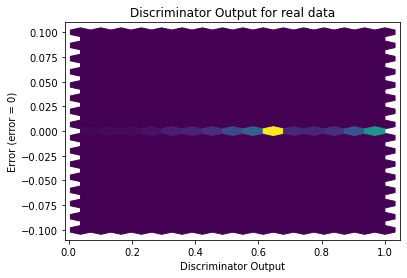

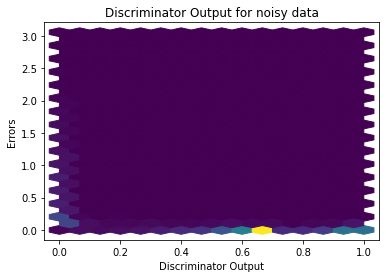

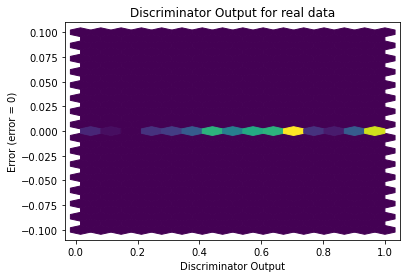

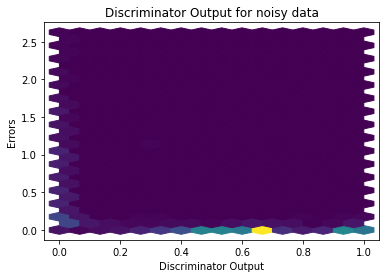

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


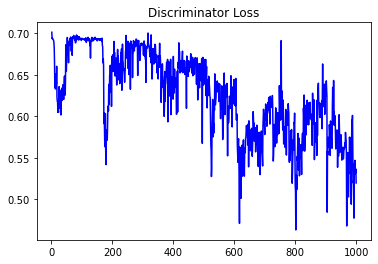

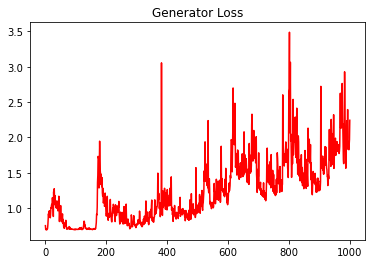

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.20672737848154246


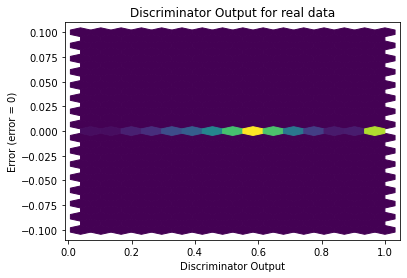

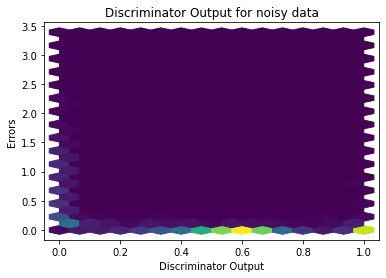

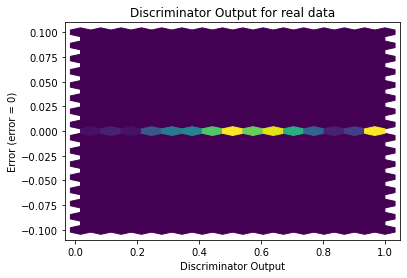

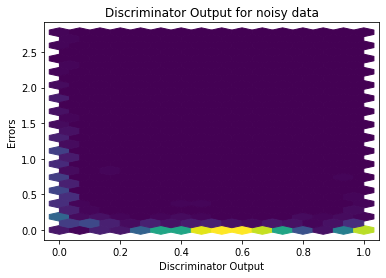

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


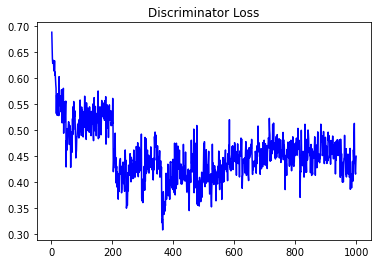

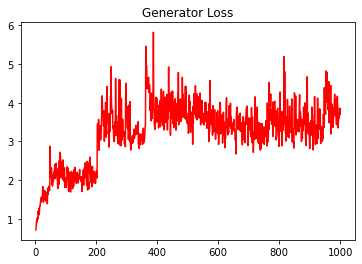

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.14161054748412852


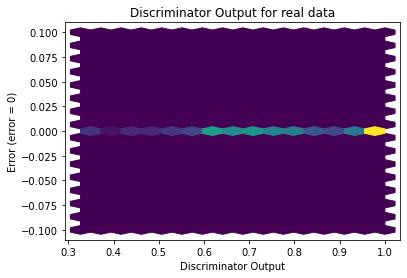

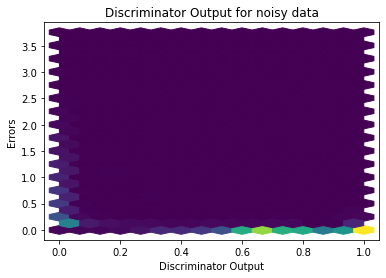

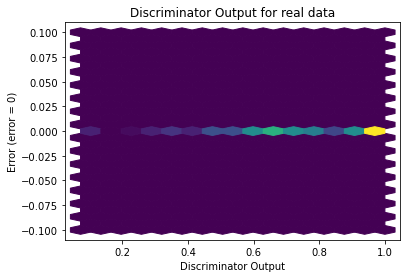

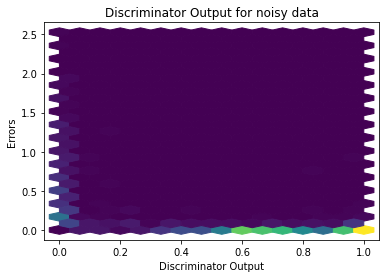

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9704]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9855]], requires_grad=True)
